In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('job_opportunities_clean.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

company                                    job_title  \
0              SGS                        Clinical Data Analyst   
1          Ocorian                       AML/CFT & Data Analyst   
2           Cricut                    Machine Learning Engineer   
3      Bosch Group         Application Developer & Data Analyst   
4  Publicis Groupe  Data Engineer Full time (Public Sector) USA   

                          location   job_type experience_level    salary  \
0    Richardson, TX, United States  Full Time      Entry-level   48000.0   
1                 Ebène, Mauritius  Full Time      Entry-level   48000.0   
2  South Jordan, UT, United States  Full Time      no-specific   90000.0   
3                 Nonantola, Italy  Full Time      Entry-level   48000.0   
4     Arlington, VA, United States  Full Time        Mid-level  108000.0   

                                        requirements  \
0  ['Computer Science', 'Data quality', 'Genetics...   
1  ['Agile', 'Data management', 'Finance', 'Secur...   
2  ['Agile', 'Architecture', 'AWS', 'Computer Sci...   
3  ['Engineering', 'Industrial', 'Oracle', 'Power...   
4  ['AWS', 'Azure', 'Computer Science', 'Consulti...   

                                          facilities  salary_conditions  \
0                                                 []               True   
1                                                 []               True   
2                             ['Career development']               True   
3                                                 []               True   
4  ['Flex hours', 'Flex vacation', 'Parental leav...              False   

  currency  Is Remote work_mode        country          city  
0      USD      False    onsite  United States    Richardson  
1      USD      False    onsite      Mauritius     Not found  
2      USD      False    onsite  United States  South Jordan  
3      USD      False    onsite          Italy     Not found  
4      USD      False    onsite  United States     Arlington

In [3]:
df['salary'].fillna(0, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            2995 non-null   object 
 1   job_title          2995 non-null   object 
 2   location           2995 non-null   object 
 3   job_type           2995 non-null   object 
 4   experience_level   2995 non-null   object 
 5   salary             2995 non-null   float64
 6   requirements       2995 non-null   object 
 7   facilities         2995 non-null   object 
 8   salary_conditions  2995 non-null   bool   
 9   currency           2995 non-null   object 
 10  Is Remote          2995 non-null   bool   
 11  work_mode          2995 non-null   object 
 12  country            2995 non-null   object 
 13  city               2995 non-null   object 
dtypes: bool(2), float64(1), object(11)
memory usage: 286.8+ KB


In [5]:
df.describe()

salary
count    2995.000000
mean    84981.545910
std     45550.558363
min         0.000000
25%     55000.000000
50%     73000.000000
75%    115000.000000
max    315000.000000

In [6]:
# Calcul des quartiles et de l'écart interquartile (IQR) pour la colonne "salary"
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

# Affichage des valeurs
print("Premier quartile (Q1) :", Q1)
print("Troisième quartile (Q3) :", Q3)
print("Écart interquartile (IQR) :", IQR)

Premier quartile (Q1) : 55000.0
Troisième quartile (Q3) : 115000.0
Écart interquartile (IQR) : 60000.0


In [7]:
# Création du graphique de boîte à moustaches avec Plotly Express
fig = px.box(df, y="salary", title="Boîte à moustaches pour la colonne 'salary'")
fig.show()

In [9]:
# Identification des valeurs aberrantes
seuil_minimum = Q1 - 1.5 * IQR
seuil_maximum = Q3 + 1.5 * IQR

print('le seuil minimum est : ', seuil_minimum)
print('le seuil maximum est : ', seuil_maximum)


aberrant_values = df[(df["salary"] < Q1 - 1.5 * IQR) | (df["salary"] > Q3 + 1.5 * IQR)]

# Suppression des valeurs aberrantes
df_cleaned = df.drop(aberrant_values.index)

le seuil minimum est :  -35000.0
le seuil maximum est :  205000.0


In [32]:
# Création du graphique de boîte à moustaches avec Plotly Express
fig = px.box(df_cleaned, y="salary", title="Boîte à moustaches pour la colonne 'salary'")
fig.show()

In [95]:
df_cleaned.to_csv('job_opportunities_clean_1.csv')

In [34]:
obj=df_cleaned.select_dtypes(include=['object'])
for i in obj:
    print(df_cleaned[i].value_counts())

company
Publicis Groupe                   113
Bosch Group                        93
Amazon.com                         57
Block                              45
Visa                               42
                                 ... 
Netcompany-Intrasoft                1
Netcompany                          1
Perceptyx                           1
PayFit                              1
Galileo Financial Technologies      1
Name: count, Length: 1105, dtype: int64
job_title
Data Engineer                                                                                            104
Data Scientist                                                                                            82
Data Analyst                                                                                              77
Senior Data Engineer                                                                                      63
Machine Learning Engineer                                                               

In [10]:
# Histogramme du salaire
fig_histogram = px.histogram(df_cleaned, x="salary", nbins=50, title="Distribution du salaire")
fig_histogram.show()

In [86]:
# Compter le nombre d'occurrences de chaque condition salariale
salary_conditions_counts = df_cleaned['salary_conditions'].value_counts()

# Créer le diagramme en secteurs (pie chart)
fig_piechart_salary_conditions = px.pie(salary_conditions_counts, 
                                        names=salary_conditions_counts.index,
                                        values=salary_conditions_counts.values,
                                        title="Proportion d'offres d'emploi avec ou sans conditions salariales")

# Afficher le diagramme en secteurs (pie chart)
fig_piechart_salary_conditions.show()

In [87]:
# Créer le diagramme en secteurs (pie chart)
fig_piechart_currency = px.pie(df_cleaned, names='currency', title="Répartition des devises pour les salaires")

# Afficher le diagramme en secteurs (pie chart)
fig_piechart_currency.show()

In [65]:
df_cleaned.columns

Index(['company', 'job_title', 'location', 'job_type', 'experience_level',
       'salary', 'requirements', 'facilities', 'salary_conditions', 'currency',
       'Is Remote', 'work_mode', 'country', 'city'],
      dtype='object')

In [66]:
# Compter le nombre d'offres d'emploi pour chaque entreprise
company_counts = df_cleaned["company"].value_counts().head(20)

# Créer un diagramme en barres pour afficher les 20 premières entreprises
fig_company = px.bar(company_counts, x=company_counts.index, y=company_counts.values,
                     title="20 premières entreprises avec le plus grand nombre d'offres d'emploi")
fig_company.show()

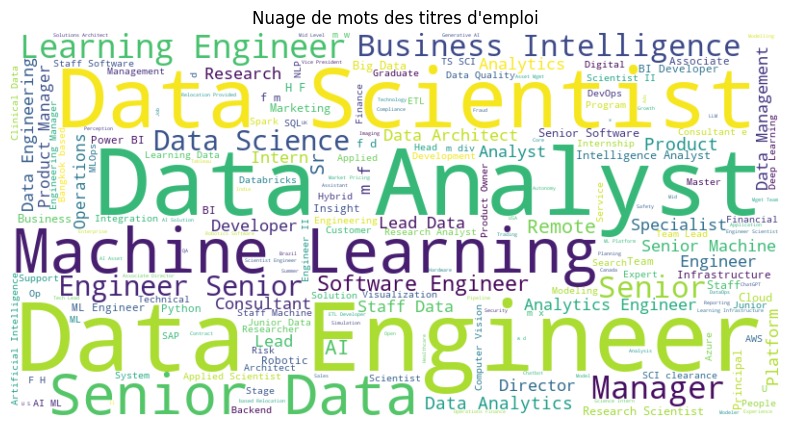

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les titres d'emploi en une seule chaîne de texte
titles_text = ' '.join(df_cleaned['job_title'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des titres d\'emploi')
plt.show()

In [85]:
# Compter le nombre d'occurrences de chaque niveau d'expérience
experience_level_counts = df_cleaned['experience_level'].value_counts()

# Créer le diagramme en barres
fig_barplot_experience_level = px.bar(experience_level_counts, x=experience_level_counts.index, y=experience_level_counts.values,
                                      title="Répartition des niveaux d'expérience requis")

# Afficher le diagramme en barres
fig_barplot_experience_level.show()

In [84]:
# Compter le nombre d'occurrences de chaque type d'emploi
job_type_counts = df_cleaned['job_type'].value_counts()

# Créer le diagramme en barres
fig_barplot_job_type = px.bar(job_type_counts, x=job_type_counts.index, y=job_type_counts.values,
                              title="Répartition des types d'emploi")

# Afficher le diagramme en barres
fig_barplot_job_type.show()

In [11]:
# Créer le nuage de points géographique
fig_map = px.scatter_geo(df_cleaned, 
                         locations='country',  # Colonne des noms de pays
                         locationmode='country names',  # Mode de localisation par nom de pays
                         title="Répartition géographique des offres d'emploi par pays")

# Afficher la carte
fig_map.show()

In [71]:
# Compter le nombre d'occurrences de chaque emplacement géographique (location)
location_counts = df_cleaned['country'].value_counts().head(10)

# Créer le diagramme circulaire (pie chart)
fig_pie_location = px.pie(values=location_counts.values, names=location_counts.index,
                          title="Répartition des offres d'emploi par emplacement géographique")
fig_pie_location.show()

In [72]:
# Compter le nombre d'occurrences de chaque type d'emploi (job_type)
job_type_counts = df_cleaned['job_type'].value_counts()

# Créer le diagramme circulaire (pie chart)
fig_pie_job_type = px.pie(values=job_type_counts.values, names=job_type_counts.index,
                          title="Répartition des offres d'emploi par type d'emploi")
fig_pie_job_type.show()

In [78]:
# Compter le nombre d'occurrences de chaque type d'emploi (job_type)
job_type_counts = df_cleaned['work_mode'].value_counts()

# Créer le diagramme circulaire (pie chart)
fig_pie_job_type = px.pie(values=job_type_counts.values, names=job_type_counts.index,
                          title="Répartition des offres d'emploi par mode du travail")
fig_pie_job_type.show()

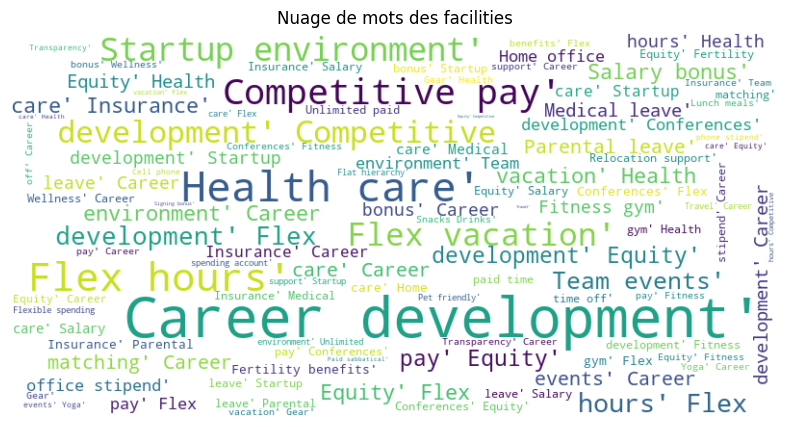

In [92]:
# Concaténer tous les titres d'emploi en une seule chaîne de texte
titles_text = ' '.join(df_cleaned['facilities'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des facilities')
plt.show()

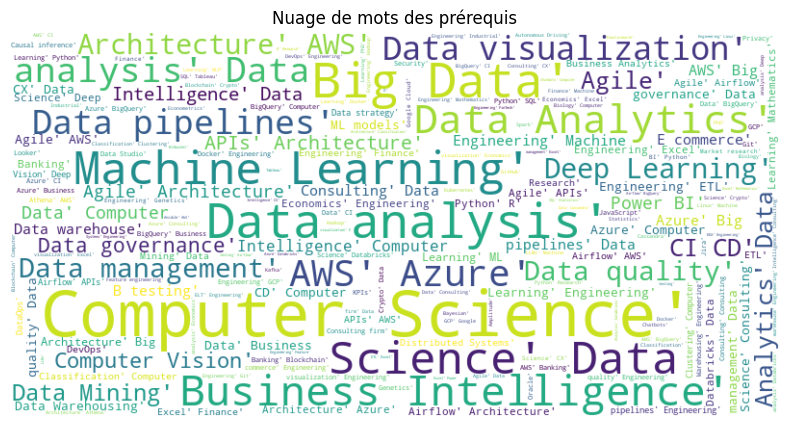

In [93]:
# Concaténer tous les titres d'emploi en une seule chaîne de texte
titles_text = ' '.join(df_cleaned['requirements'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des prérequis')
plt.show()

In [82]:
# Créer le nuage de points
fig_scatter = px.scatter(df_cleaned, x='salary', y='experience_level', color='job_type', hover_name='job_title',
                         size='salary', title='Nuage de points des offres d\'emploi')
fig_scatter.show()

In [81]:
# Compter le nombre d'occurrences de chaque titre d'emploi
job_title_counts = df_cleaned['job_title'].value_counts().head(5)

# Filtrer le DataFrame pour inclure uniquement les 10 premiers titres d'emploi avec le plus grand nombre d'occurrences
top_20_job_titles = df_cleaned[df_cleaned['job_title'].isin(job_title_counts.index)]

# Créer le nuage de points
fig_scatter_job_titles = px.scatter(top_20_job_titles, x='salary', y='experience_level', color='job_title',
                                    hover_name='job_title', size='salary', title='Nuage de points des 20 premiers titres d\'emploi')
fig_scatter_job_titles.show()